In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#IMPORTING DATASET
current_employees = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx', sheet_name = 'Existing employees')
ex_employees = pd.read_excel('Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx', sheet_name = 'Employees who have left')


In [3]:
current_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [4]:
ex_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [5]:
current_employees.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [6]:
ex_employees.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [7]:
current_employees.shape,ex_employees.shape

((11428, 10), (3571, 10))

In [8]:
current_employees.columns,ex_employees.columns

(Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years', 'dept', 'salary'],
       dtype='object'),
 Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years', 'dept', 'salary'],
       dtype='object'))

In [9]:
current_employees['Job_status']='active'
ex_employees['Job_status']='inactive'

In [10]:
current_employees.columns,ex_employees.columns

(Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years', 'dept', 'salary', 'Job_status'],
       dtype='object'),
 Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'Work_accident',
        'promotion_last_5years', 'dept', 'salary', 'Job_status'],
       dtype='object'))

In [11]:
data_merge = [current_employees, ex_employees]


In [12]:
emp_history = pd.concat(data_merge)
emp_history

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Job_status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,active
1,2002,0.82,0.67,2,202,3,0,0,sales,low,active
2,2003,0.45,0.69,5,193,3,0,0,sales,low,active
3,2004,0.78,0.82,5,247,3,0,0,sales,low,active
4,2005,0.49,0.60,3,214,2,0,0,sales,low,active
...,...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,support,low,inactive
3567,14996,0.37,0.48,2,160,3,0,0,support,low,inactive
3568,14997,0.37,0.53,2,143,3,0,0,support,low,inactive
3569,14998,0.11,0.96,6,280,4,0,0,support,low,inactive


In [13]:
emp_history.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
Job_status               0
dtype: int64

# ENCODING CATEGORICAL DATA

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
emp_history['Job_status'] = le.fit_transform(emp_history['Job_status'])
emp_history['dept'] = le.fit_transform(emp_history['dept'])
emp_history['salary']=le.fit_transform(emp_history['salary'])



In [49]:
pd.get_dummies(emp_history)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Job_status
0,2001,0.58,0.74,4,215,3,0,0,7,1,0
1,2002,0.82,0.67,2,202,3,0,0,7,1,0
2,2003,0.45,0.69,5,193,3,0,0,7,1,0
3,2004,0.78,0.82,5,247,3,0,0,7,1,0
4,2005,0.49,0.60,3,214,2,0,0,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,8,1,1
3567,14996,0.37,0.48,2,160,3,0,0,8,1,1
3568,14997,0.37,0.53,2,143,3,0,0,8,1,1
3569,14998,0.11,0.96,6,280,4,0,0,8,1,1


In [50]:
X= emp_history[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years','dept', 'salary']].values
Y = emp_history[['Job_status']].values

In [51]:
X

array([[0.58, 0.74, 4.  , ..., 0.  , 7.  , 1.  ],
       [0.82, 0.67, 2.  , ..., 0.  , 7.  , 1.  ],
       [0.45, 0.69, 5.  , ..., 0.  , 7.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 8.  , 1.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 8.  , 1.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 8.  , 1.  ]])

In [52]:
Y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [54]:
emp_history.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Job_status
0,2001,0.58,0.74,4,215,3,0,0,7,1,0
1,2002,0.82,0.67,2,202,3,0,0,7,1,0
2,2003,0.45,0.69,5,193,3,0,0,7,1,0
3,2004,0.78,0.82,5,247,3,0,0,7,1,0
4,2005,0.49,0.60,3,214,2,0,0,7,1,0


# SPLITTING DATA TO TRAIN AND TEST SET

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
X_train, X_test, Y_train, Y_test

(array([[0.51, 0.79, 4.  , ..., 0.  , 9.  , 1.  ],
        [0.51, 0.84, 4.  , ..., 0.  , 9.  , 1.  ],
        [0.8 , 0.72, 4.  , ..., 0.  , 2.  , 1.  ],
        ...,
        [0.63, 0.7 , 5.  , ..., 0.  , 4.  , 0.  ],
        [0.94, 0.59, 3.  , ..., 0.  , 7.  , 1.  ],
        [0.7 , 0.64, 4.  , ..., 1.  , 5.  , 0.  ]]),
 array([[0.49, 0.92, 5.  , ..., 0.  , 5.  , 1.  ],
        [0.85, 0.85, 4.  , ..., 0.  , 9.  , 1.  ],
        [0.44, 0.37, 2.  , ..., 0.  , 9.  , 1.  ],
        ...,
        [0.4 , 0.45, 2.  , ..., 0.  , 9.  , 1.  ],
        [0.81, 0.77, 3.  , ..., 0.  , 9.  , 1.  ],
        [0.68, 0.49, 4.  , ..., 0.  , 7.  , 1.  ]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=int64),
 array([[0],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=int64))

# FEATURE SCALING

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# BUILDING AND APPLYING MACHINE LEARNING ALGORITHMS

In [61]:
#fitting logistc regression to training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0,solver='lbfgs')
classifier.fit(X_train,Y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
#predicting test results
Y_pred = classifier.predict(X_test)
var_prob = classifier.predict_proba(X_test)


In [68]:
from sklearn.metrics import classification_report
cr = classification_report(Y_test,Y_pred)
print (cr)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2274
           1       0.55      0.28      0.37       726

    accuracy                           0.77      3000
   macro avg       0.68      0.60      0.62      3000
weighted avg       0.74      0.77      0.74      3000



In [70]:
#fitting random forest classification to training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10 ,criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [71]:
# predicting test set results
Y_pred1 = classifier.predict(X_test)
Y_pred1,Y_test

(array([0, 1, 0, ..., 1, 0, 0], dtype=int64), array([[0],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=int64))

In [72]:
from sklearn.metrics import classification_report
cr1 = classification_report(Y_test,Y_pred1)
print (cr1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2274
           1       0.99      0.98      0.99       726

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [73]:
#fitting decision tree to training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [74]:
# predicting test set results
Y_pred2 = classifier.predict(X_test)

In [75]:
from sklearn.metrics import classification_report
cr2 = classification_report(Y_test,Y_pred2)
print (cr2)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2274
           1       0.95      0.98      0.97       726

    accuracy                           0.98      3000
   macro avg       0.97      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [77]:
#fitting k-NN to training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5 ,metric='minkowski' ,p=2)
classifier.fit(X_train ,Y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [78]:
# predicting test set results
Y_pred3 = classifier.predict(X_test)
var_prob1 = classifier.predict_proba(X_test)

In [79]:
from sklearn.metrics import classification_report
cr3 = classification_report(Y_test,Y_pred3)
print (cr3)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2274
           1       0.89      0.94      0.91       726

    accuracy                           0.96      3000
   macro avg       0.94      0.95      0.94      3000
weighted avg       0.96      0.96      0.96      3000



In [81]:
#fitting SVM to training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train ,Y_train.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [82]:
# predicting test set results
Y_pred4 = classifier.predict(X_test)

In [83]:
from sklearn.metrics import classification_report
cr4 = classification_report(Y_test,Y_pred4)
print (cr4)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2274
           1       0.00      0.00      0.00       726

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.57      0.76      0.65      3000



C:\Users\dogo10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# DATA VISUALIZATION

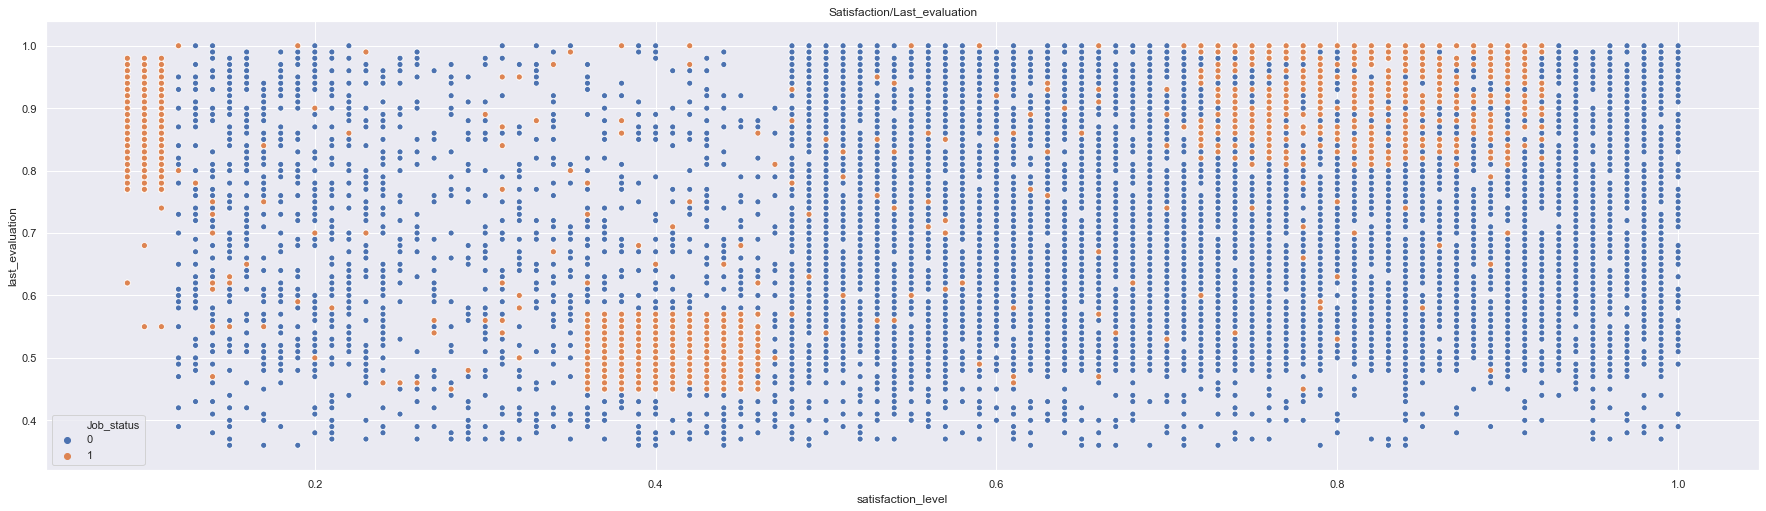

In [84]:
sns.scatterplot(x=emp_history["satisfaction_level"], y=emp_history["last_evaluation"], hue=emp_history["Job_status"])
plt.title('Satisfaction/Last_evaluation')
plt.savefig('Satisfaction-Last_evaluation.png')


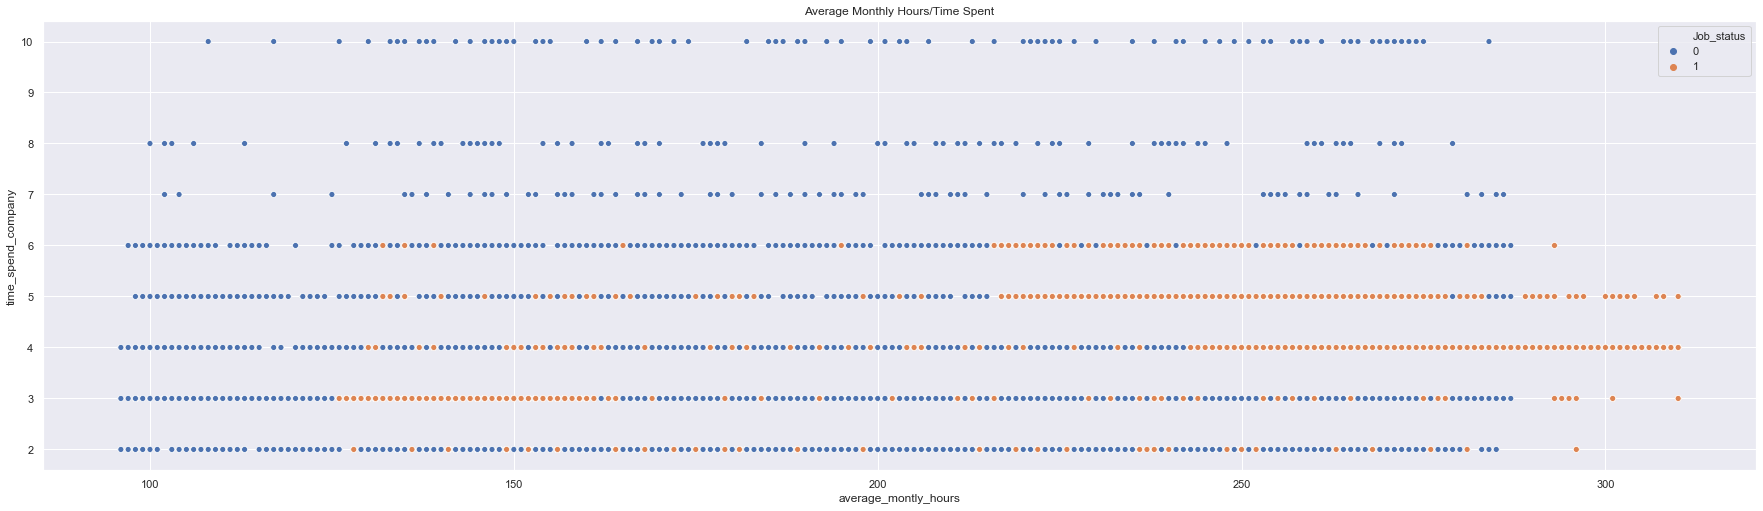

In [85]:
sns.scatterplot(x=emp_history["average_montly_hours"],y=emp_history["time_spend_company"],hue=emp_history["Job_status"])
plt.title('Average Monthly Hours/Time Spent')
plt.savefig('average_monthly_hours-time_spent.png')

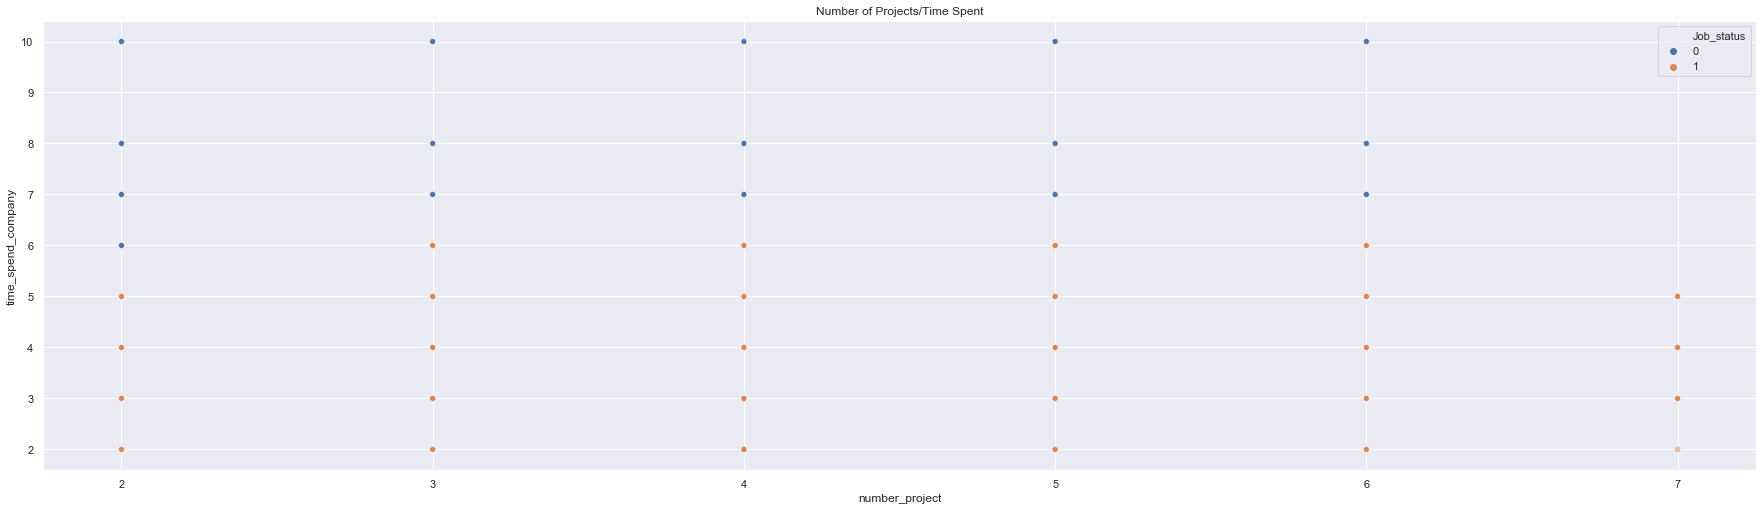

In [95]:
sns.scatterplot(x=emp_history["number_project"],y=emp_history["time_spend_company"],hue=emp_history["Job_status"],color='green',alpha=0.5,)
plt.title('Number of Projects/Time Spent')
plt.savefig('number_project-time_spent.png')

In [16]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = emp_history.corr()
corr.style.background_gradient(cmap='coolwarm')

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Emp ID,1,0.045841,-0.018168,-0.0121237,-0.00984982,0.144159,0.0159307,0.0889941
satisfaction_level,0.045841,1,0.105021,-0.14297,-0.0200481,-0.100866,0.0586972,0.0256052
last_evaluation,-0.018168,0.105021,1,0.349333,0.339742,0.131591,-0.00710429,-0.00868377
number_project,-0.0121237,-0.14297,0.349333,1,0.417211,0.196786,-0.00474055,-0.00606396
average_montly_hours,-0.00984982,-0.0200481,0.339742,0.417211,1,0.127755,-0.0101429,-0.00354441
time_spend_company,0.144159,-0.100866,0.131591,0.196786,0.127755,1,0.00212042,0.0674329
Work_accident,0.0159307,0.0586972,-0.00710429,-0.00474055,-0.0101429,0.00212042,1,0.0392454
promotion_last_5years,0.0889941,0.0256052,-0.00868377,-0.00606396,-0.00354441,0.0674329,0.0392454,1


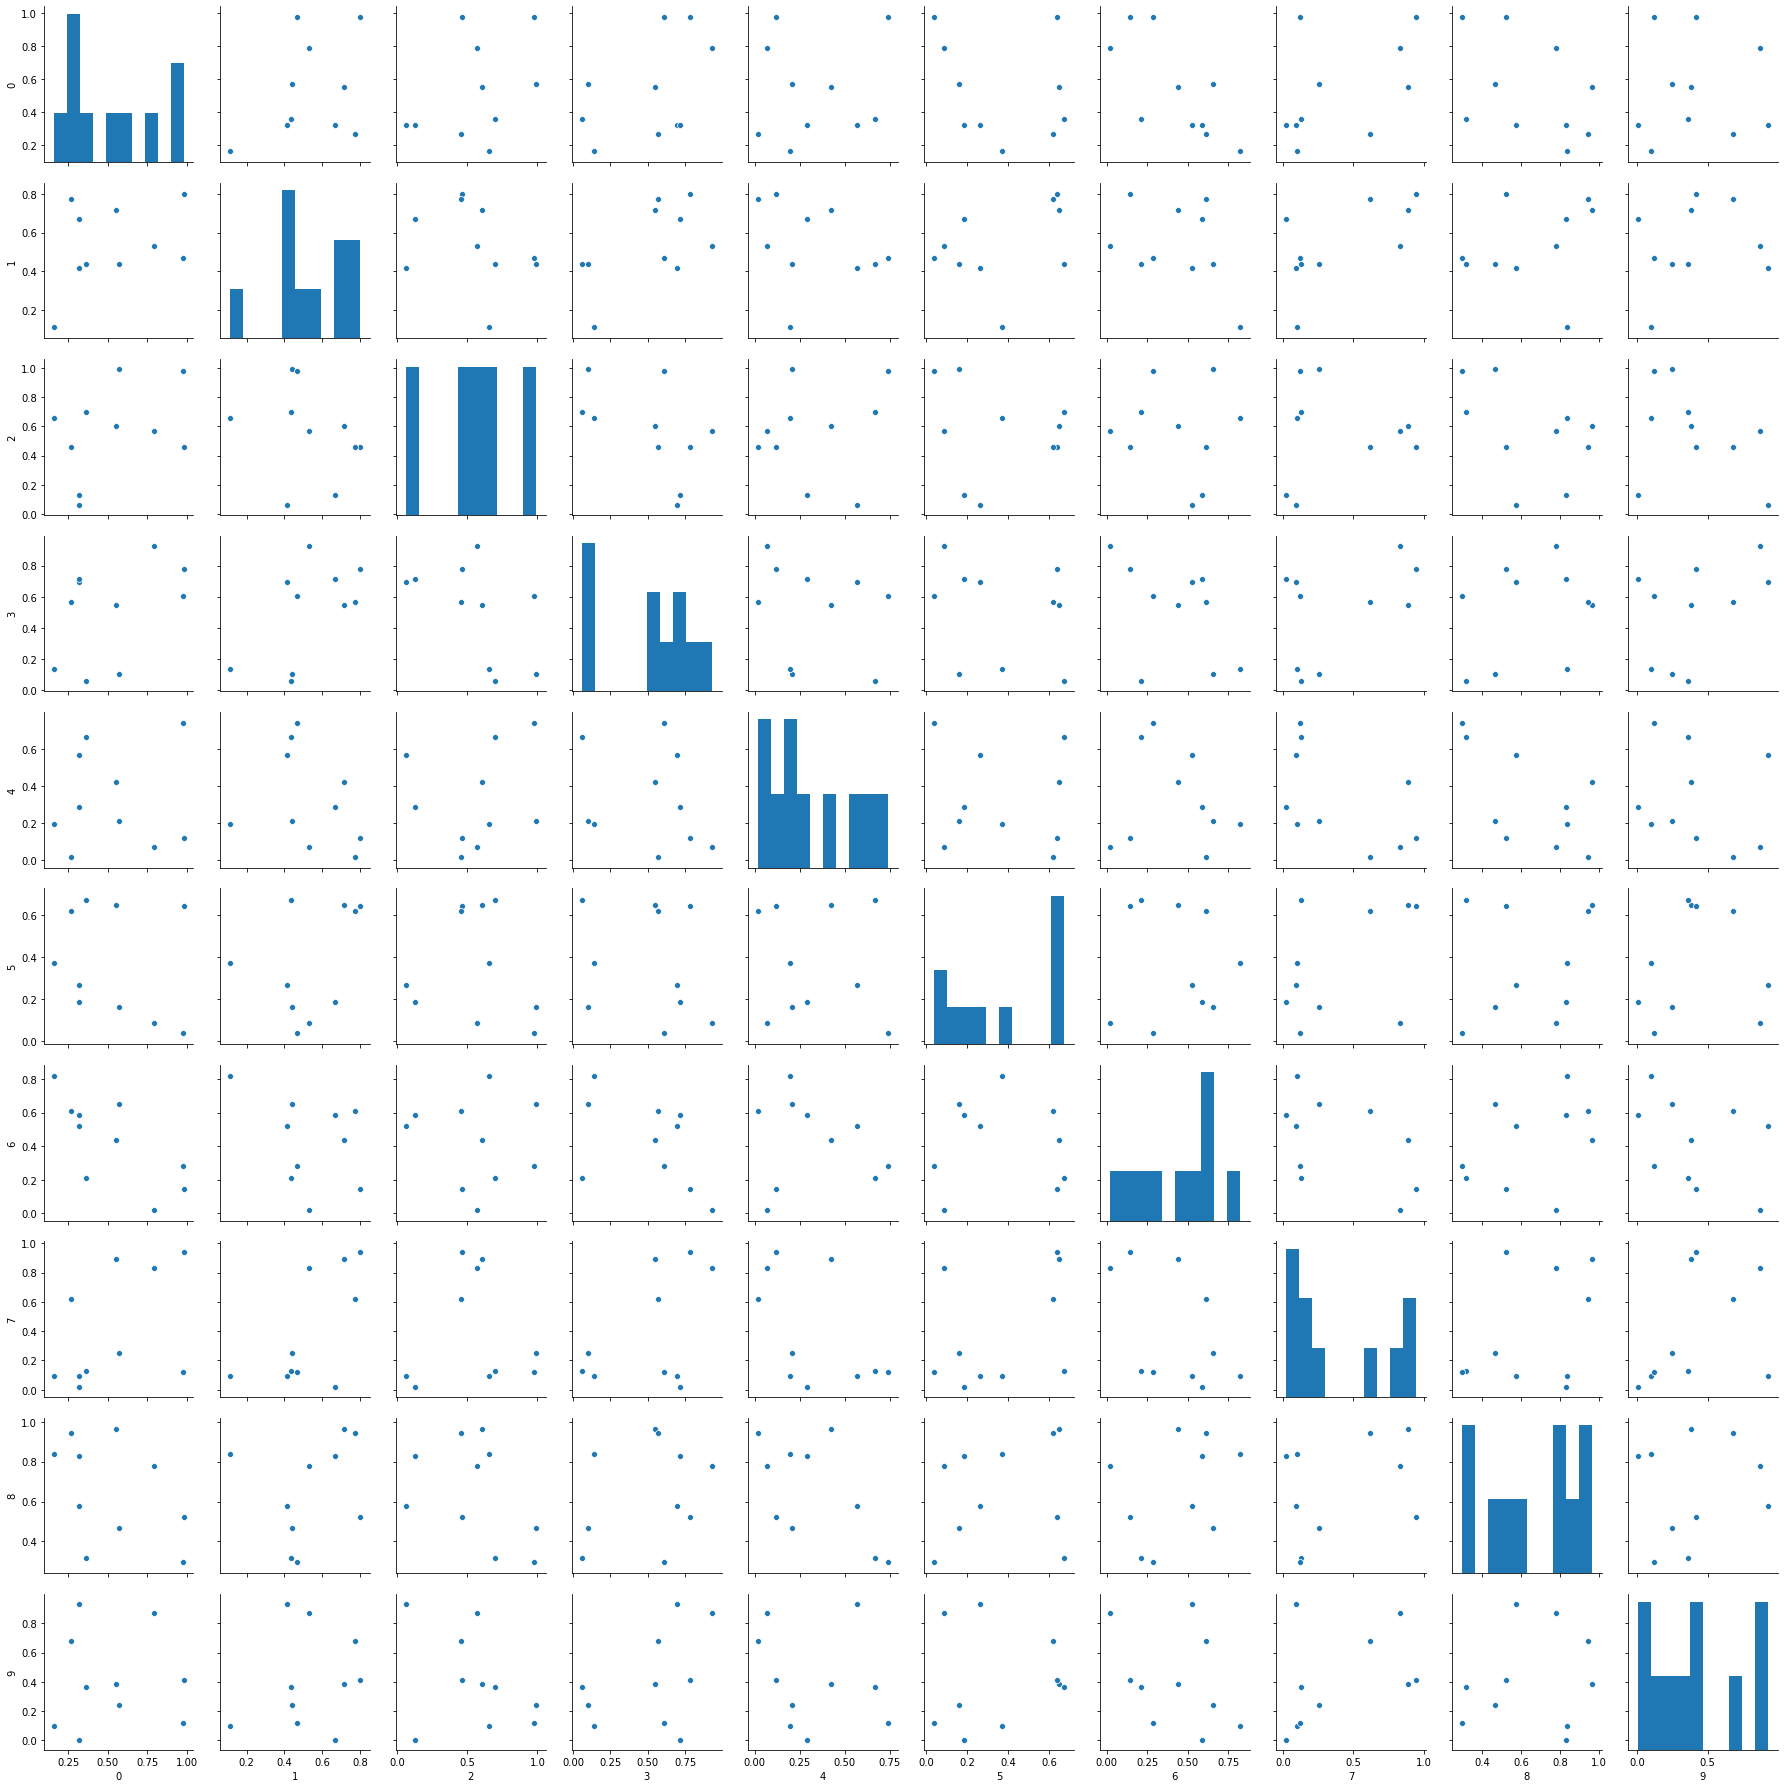

In [17]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
sns.pairplot(df)

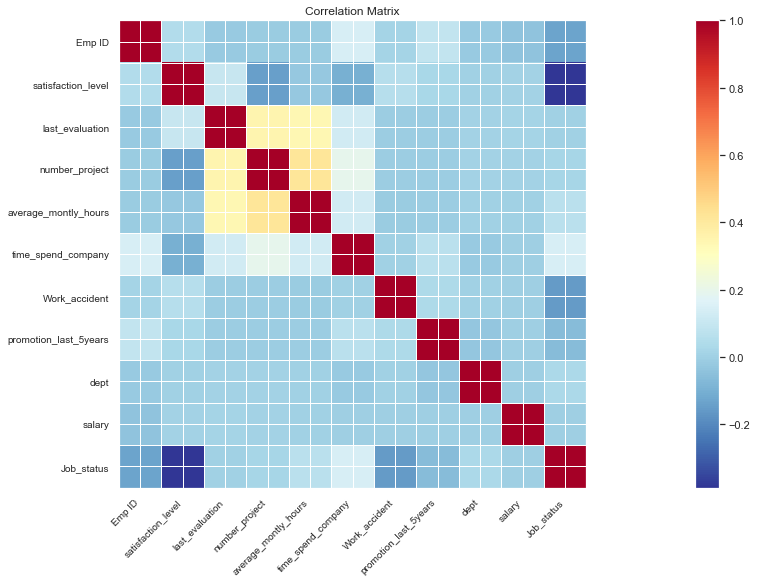

<Figure size 2210.4x595.44 with 0 Axes>

In [98]:
corr = emp_history.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()
plt.savefig('Correlation-Matrix-Graphics.png')


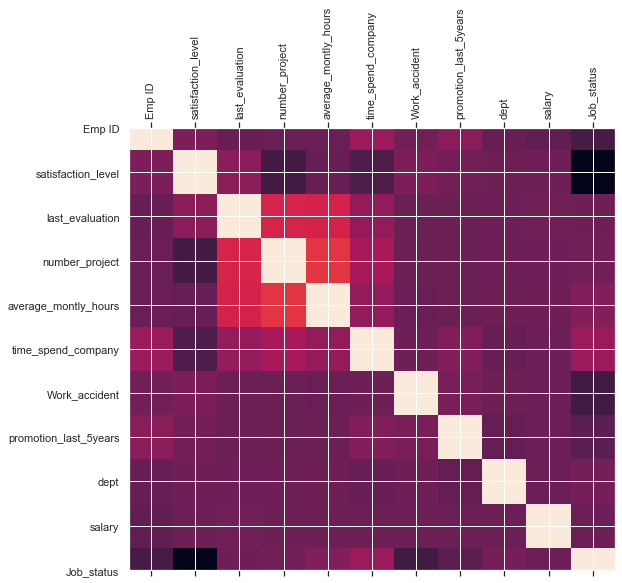

In [97]:
corr = emp_history.corr()
fig, ax = plt.subplots(figsize=(30.7,8.27))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);
plt.tight_layout()
plt.savefig('Correlation-Matrix-Subplots.png')

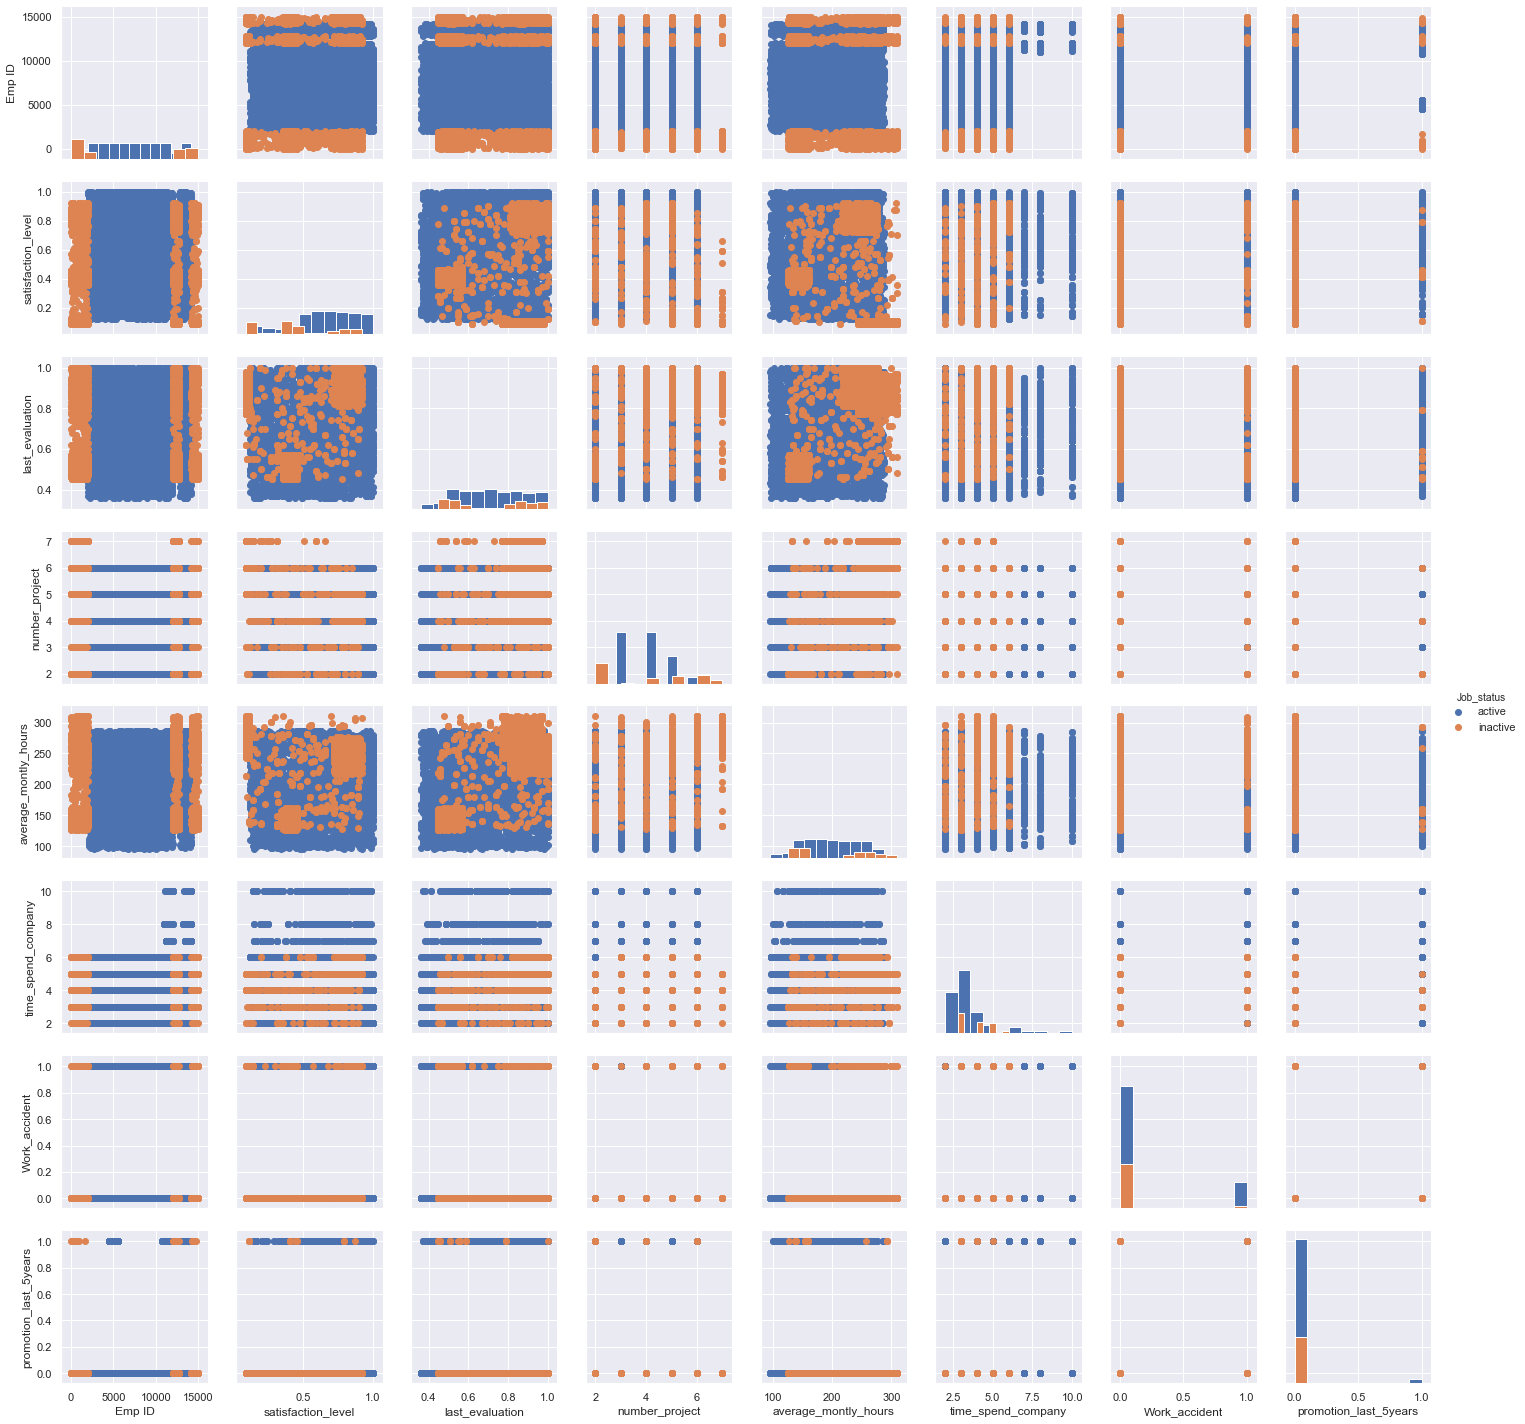

In [20]:
sns.set(rc={'figure.figsize':(30.7,8.27)})
g = sns.PairGrid(emp_history, hue = 'Job_status');
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.savefig('CorrelationMatrix.png')

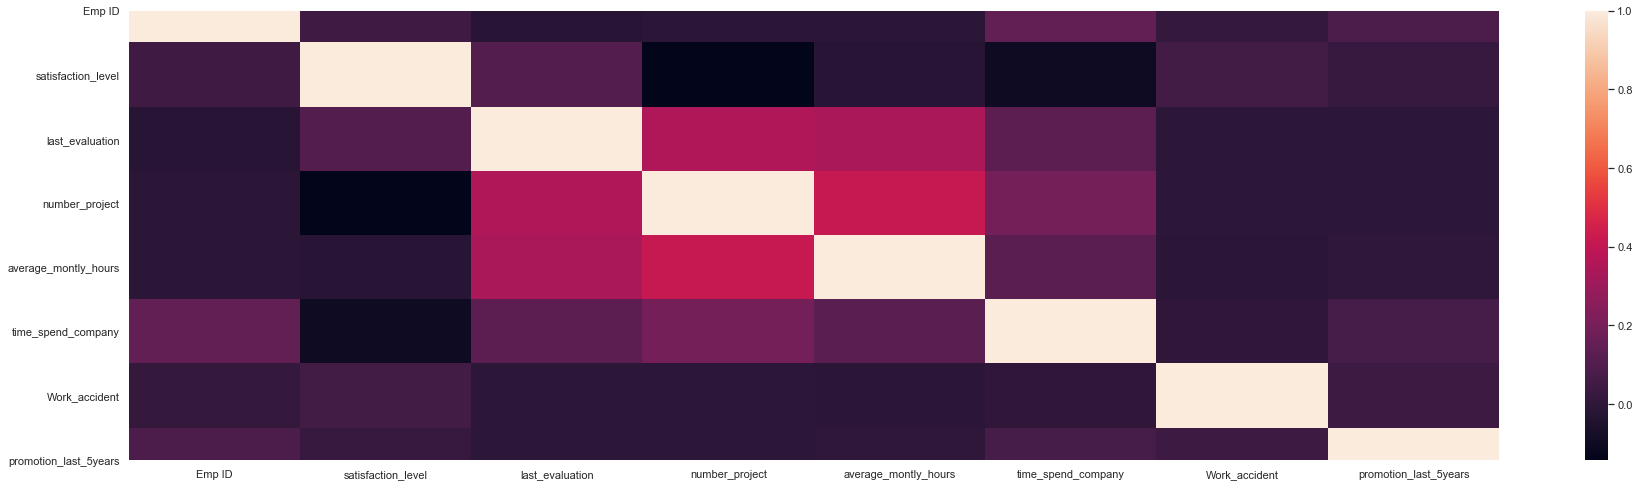

In [21]:
sns.heatmap(emp_history.corr())
plt.savefig('CorrelationHeatmap.png')

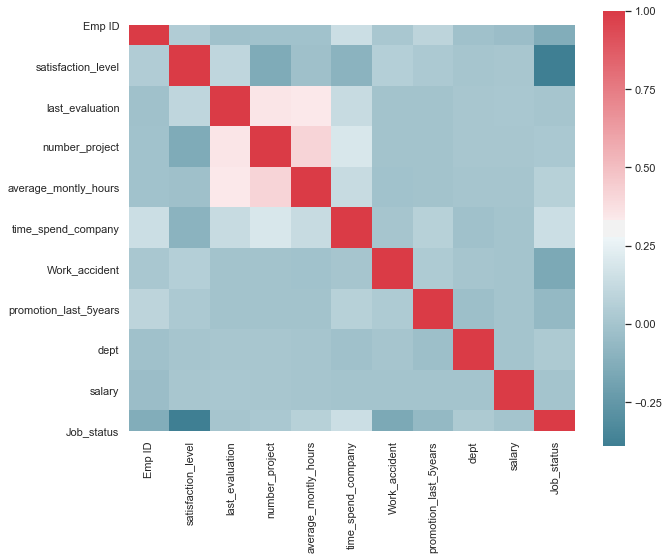

In [96]:
f, ax = plt.subplots(figsize=(10, 8))
corr = emp_history.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig('Seaborn CorrelationHeatmap2.png')